# Pymaceuticals Inc.
---


In [1]:
# Dependencies and Setup 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from matplotlib.patches import Polygon


# Study data files
mouse_metadata_path = "data/Mouse_Metadata.csv"
study_results_path = "data/Study_Results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:

# Combine the data into a single DataFrame
preclinical_df= pd.merge(study_results, mouse_metadata,how='left',on="Mouse ID")
preclinical_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
len(preclinical_df['Mouse ID'].value_counts())

249

In [8]:
# Indentifying duplicate mouse ID row as an array
df2 = preclinical_df[preclinical_df.duplicated(['Mouse ID', 'Timepoint'])]
df2_duplicate = df2['Mouse ID'].unique()
df2_duplicate

array(['g989'], dtype=object)

In [10]:
# Indentifying duplicate mouse ID as a list
list(df2_duplicate)

['g989']

In [11]:
#Identifying rows where duplicate mouse ID information is stored
duplicate_id=preclinical_df.loc[preclinical_df['Mouse ID'] == 'g989']
duplicate_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Note from tutoring session: Other option is to use: .duplicated function, subset []
clean_preclinical= preclinical_df.drop(preclinical_df[preclinical_df['Mouse ID']=='g989'].index)
clean_preclinical

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [13]:
#Confirming number of unique mouse IDs is one less than previously counted (249-1)
len(clean_preclinical['Mouse ID'].value_counts())

248

## Summary Statistics

In [14]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_s=clean_preclinical.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
med_s=clean_preclinical.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
var_s=clean_preclinical.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
std_s=clean_preclinical.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
sem_s=clean_preclinical.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary=pd.DataFrame({
    "Mean Tumor Volume":mean_s,"Median Tumor Volume":med_s,"Tumor Volume Variance":var_s,"Tumor Volume Std. Dev":std_s,
    "Tumor Volume Std. Err.":sem_s
})
summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary2=clean_preclinical.groupby('Drug Regimen').agg({
    "Tumor Volume (mm3)":['mean','median','var','std','sem']
})
summary2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [17]:
#Create a data frame that counts the number of mice being treated with each drug to use for plots below
count_mice=pd.DataFrame(clean_preclinical.groupby('Drug Regimen')["Mouse ID"].count())
count_mice.columns=['Mouse Count']
count_mice=count_mice.sort_values('Mouse Count', ascending=False)
count_mice

,Mouse Count
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


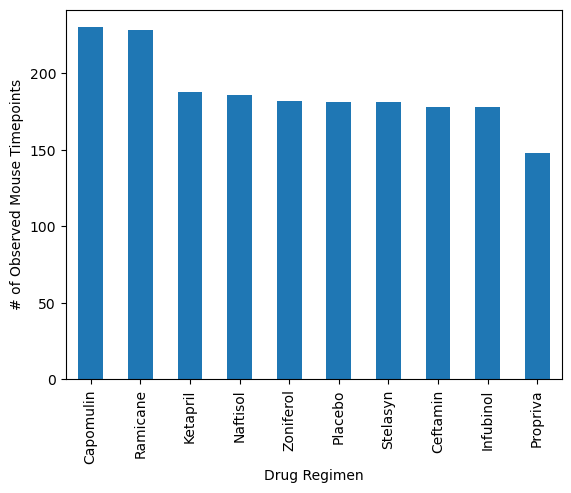

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#count_mice.plot.bar() could be another option
pandas_bar = count_mice.plot(kind='bar',legend=False,ylabel='# of Observed Mouse Timepoints')


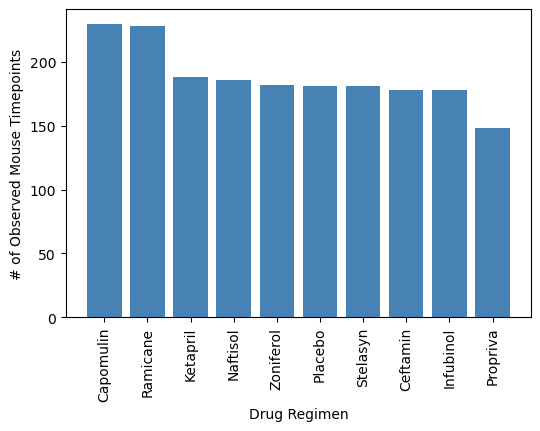

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(count_mice))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(6,4))
plt.bar(x_axis, count_mice['Mouse Count'],width=0.8,color="steelblue",alpha=1 ,align="center")
plt.xticks(tick_locations, count_mice.index.values, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()



In [19]:
# Using pandas to calculate size of "pie slices" for pie chart below - based on sex of mice
mice_sex=pd.DataFrame(clean_preclinical.groupby('Sex')['Mouse ID'].count())
mice_sex



,Mouse ID
Sex,
Female,922
Male,958


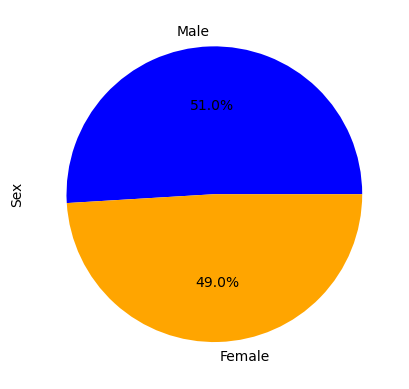

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = [958,922]
colors = ["blue", "orange"]
plt.pie(sizes, labels=labels, autopct="%0.1f%%", colors=colors)
plt.ylabel('Sex')
plt.show()

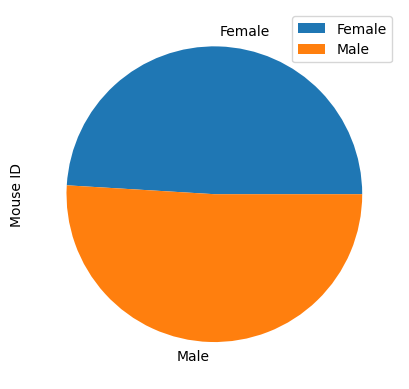

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
plot = mice_sex.plot.pie(subplots=True)

## Quartiles, Outliers and Boxplots

In [22]:
groupby2b = clean_preclinical.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_datab=pd.merge(clean_preclinical,groupby2b,on=['Mouse ID','Timepoint'])
tumor_datab

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#success_regimen=clean_preclinical[clean_preclinical["Timepoint"] == 45]
#success_regimen
groupby2 = clean_preclinical.groupby('Mouse ID')['Timepoint'].max()
last_time=groupby2.reset_index()
last_time
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_data=pd.merge(clean_preclinical,last_time,on=['Mouse ID','Timepoint'])
tumor_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [24]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

treatment_list=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol=[]
for drug in treatment_list:
    filtered1=tumor_data[tumor_data['Drug Regimen']== drug]
    filtered1=filtered1['Tumor Volume (mm3)']
    tumor_vol.append(filtered1)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = filtered1.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier=filtered1[(filtered1>upper_bound) | (filtered1<lower_bound)]
    print(f"{drug}'s'potential outliers: {outlier}")


Capomulin's'potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's'potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's'potential outliers: 20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's'potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


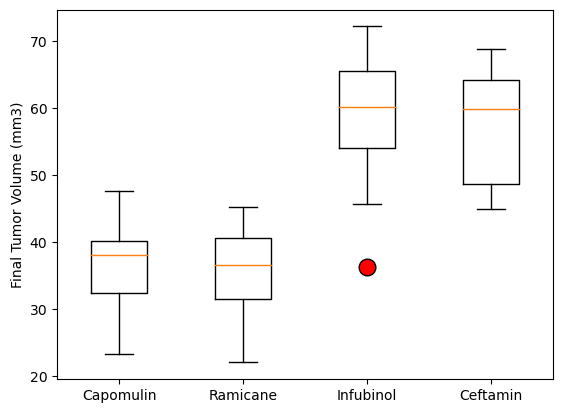

In [25]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
#tick_locations = [value for value in x_axis]
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol,labels=treatment_list, flierprops={'marker': 'o','markersize': 12, 'markerfacecolor': 'red'})

#plt.xticks(tick_locations,treatment_list,rotation='vertical')
plt.show()

## Line and Scatter Plots

In [26]:
#Mouse l509 data only
mouse_509 = clean_preclinical[clean_preclinical['Mouse ID']=='l509']
mouse_509

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


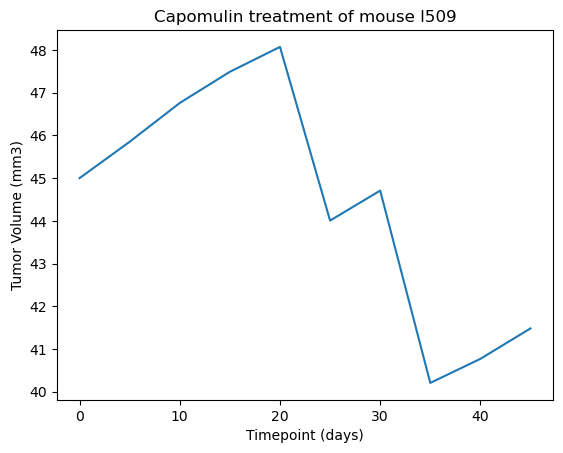

In [27]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
l509_time=mouse_509['Timepoint']
l509_tumor=mouse_509['Tumor Volume (mm3)']
plt.plot(l509_time, l509_tumor)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

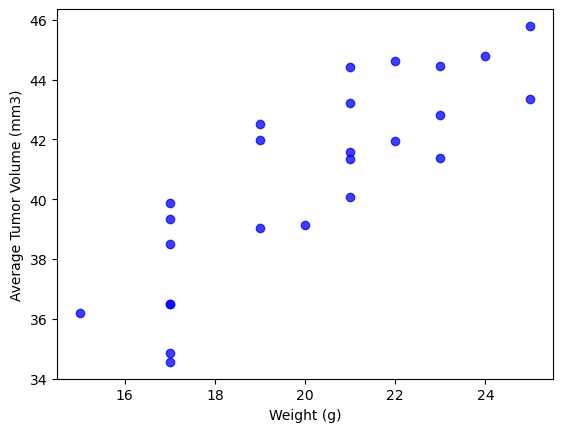

In [33]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_test=clean_preclinical[clean_preclinical['Drug Regimen']== 'Capomulin']
scatter_tv=pd.DataFrame(scatter_test.groupby('Mouse ID')['Tumor Volume (mm3)'].mean())
scatter_tv
scatter_wt=pd.DataFrame(scatter_test.groupby('Mouse ID')['Weight (g)'].mean())
scatter_wt
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.scatter(scatter_wt,scatter_tv, marker="o", facecolors="blue", alpha=0.75)
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


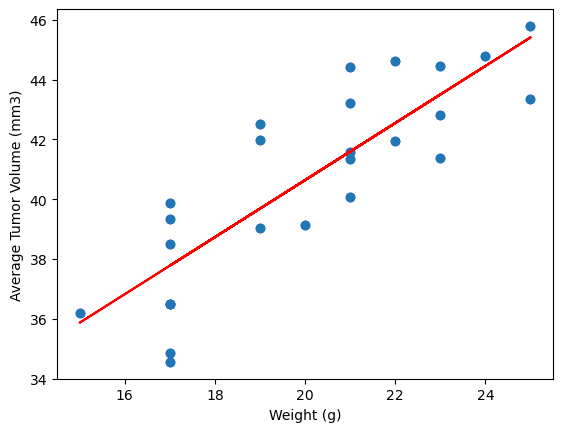

In [31]:
# Calculate the correlation coefficient 
#Plot linear regression model with regression line
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

weight = scatter_wt.iloc[:,0]
atv= scatter_tv.iloc[:,0]
correlation = st.pearsonr(weight,atv)
correlation 
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x_values = scatter_wt['Weight (g)']
y_values = scatter_tv['Tumor Volume (mm3)']
plt.scatter(x_values,y_values, marker="o", facecolors="blue", alpha=0.75)
slope, intercept, r_value, p_value, std_err = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

